In [ ]:
-----------Assignment----------
q1. take a data set from attached url https://archive.ics.uci.edu/ml/machine-learning-databases/car/
q2. create a database called as cardataset
q3. create a table called as car with a column name given
in dataset descrptions
q4. dump all the data into car table
q5. try to check whether all the data is available inside
your table or not
q6. try to group all the data with col3 and count occurences
of each and every record based on col3 value
q7. try to filter a record where col3 value will be 4.
q8. try to update col3 value with 8 wherever you have 
value = 2
q9. try to delete table
q10. try to delete database

## Cleaning car data

In [1]:
import csv

clean_car_data = []
with open("/home/mobo/Documents/Ineuron/Live Class/car.data") as file:
    car_data = csv.reader(file)
    
    # creating 2 new cols for values greater than 4, in col 2 and 3.
    for row in car_data:
        if row[2] == "5more" and row[3] == "more":
            row[2], row[3] = "null", "null"
            row.extend(["5more", "more"])
            clean_car_data.append(row)
        elif row[2] == "5more" and row[3].isdigit():
            row[2] = "null"
            row.extend(["5more", "null"])
            clean_car_data.append(row)
        elif row[2].isdigit() and row[3] == "more":
            row[3] = "null"
            row.extend(["null", "more"])
            clean_car_data.append(row)
        else:
            row.extend(["null", "null"])
            clean_car_data.append(row)
        
     

## Creating new file for cleaned car data

In [2]:
# writing cleaned car data to a new file
with open("clean_car_data", "w+") as clean_car:
    csv_writer = csv.writer(clean_car)
    csv_writer.writerows(clean_car_data)

### Creating db connection

In [3]:
import mysql.connector as conn
mydb = conn.connect(host="localhost", user="root", passwd="MySQL")

### Creating db and table

In [4]:
cursor = mydb.cursor()
cursor.execute("CREATE DATABASE cardataset")
cursor.execute("CREATE TABLE cardataset.car(buying varchar(10), maint varchar(10),"
               "doors_lt_5 varchar(10), person_lt_5 varchar(10), lug_boot varchar(10)," 
               "safety varchar(10), class_values varchar(10), doors_gt_4 varchar(10), "
               "person_gt_4 varchar(10))")

### Inserting data into car table

In [5]:
with open("clean_car_data") as clean_file:
    csv_reader = csv.reader(clean_file)
    for row in csv_reader:
        cursor.execute("INSERT INTO cardataset.car VALUES('{0}', '{1}', '{2}', '{3}', '{4}', '{5}', '{6}', '{7}', '{8}')".format(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8]))
        
mydb.commit()


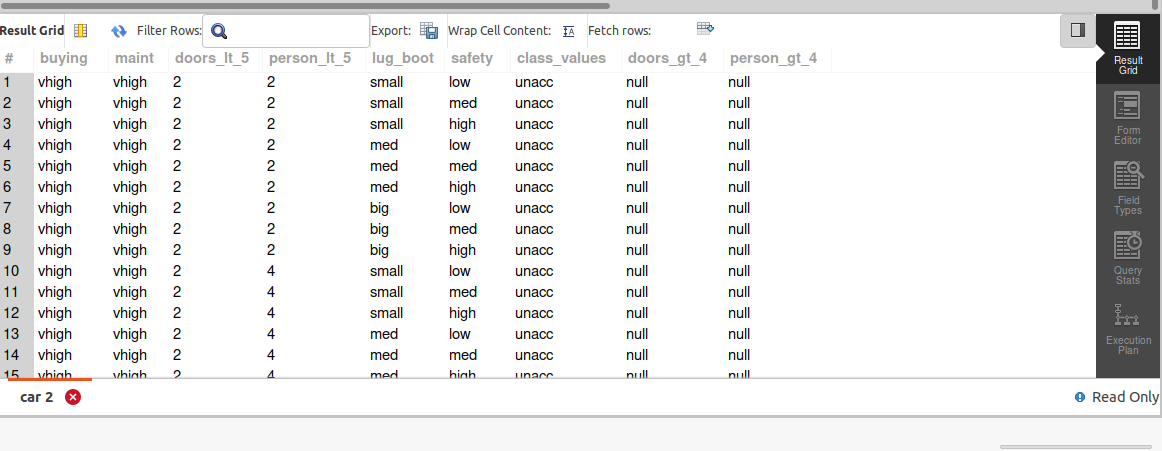

### Verifying contents of table

In [6]:
cursor.execute("SELECT COUNT(*) FROM cardataset.car")
cursor.fetchall()

[(1728,)]

### Grouping the data by col3 (doors_lt_5)

In [7]:
# q6. try to group all the data with col3 and count occurences
cursor.execute("SELECT doors_lt_5, COUNT(doors_lt_5), doors_gt_4, COUNT(doors_gt_4) \
               FROM cardataset.car GROUP BY doors_lt_5, doors_gt_4")

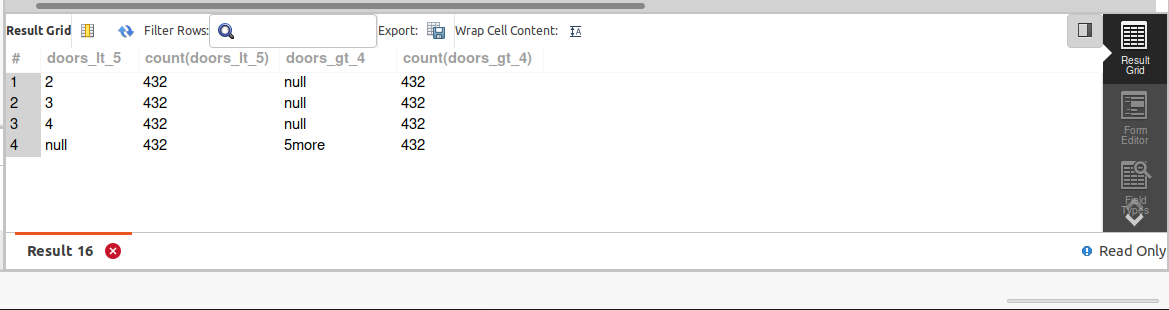

In [8]:
cursor.fetchall()

[('2', 432, 'null', 432),
 ('3', 432, 'null', 432),
 ('4', 432, 'null', 432),
 ('null', 432, '5more', 432)]

### Filtering col3 (doors_lt_5) values where value = 4

In [9]:
cursor.execute("SELECT * FROM cardataset.car WHERE doors_lt_5 = 4")

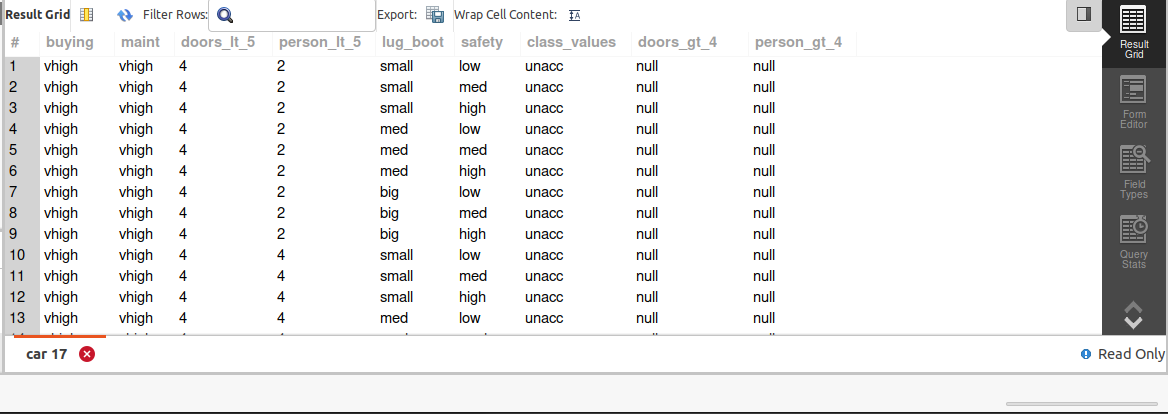

### Updating col3 (door_lt_5) values from 2 to 8

In [17]:
mydb.is_connected()

False

In [10]:
mydb = conn.connect(host="localhost", user="root", passwd="MySQL")
cursor = mydb.cursor()
cursor.execute("UPDATE cardataset.car SET doors_lt_5 = '8' where doors_lt_5 = '2'")
mydb.commit()

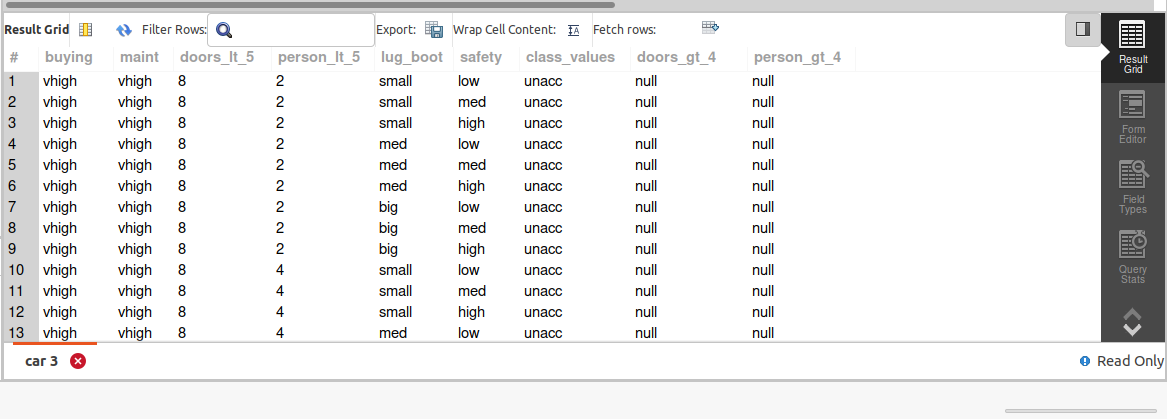

### Delete table

In [11]:
cursor.execute("use cardataset")
cursor.execute("DROP table IF EXISTS cardataset.car")

In [12]:
cursor.execute("show tables")
cursor.fetchall()

[]

### Delete Database


In [13]:
cursor.execute("show databases")
cursor.fetchall()

[('cardataset',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sudh',),
 ('sys',),
 ('test123',),
 ('testsudhineuron',)]

In [14]:
cursor.execute("drop database IF EXISTS cardataset")

In [15]:
cursor.execute("show databases")
cursor.fetchall()

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sudh',),
 ('sys',),
 ('test123',),
 ('testsudhineuron',)]